In [2]:
import mlflow
import xarray as xr
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/scratch/cimes/cz3321/MOM6/experiments/double_gyre/postprocess/offline_test')

# %env MLFLOW_TRACKING_URI /scratch/ag7531/mlruns

In [3]:
import xarray as xr
import numpy as np
import math

In [4]:
prog = xr.open_mfdataset('/scratch/cimes/cz3321/MOM6/experiments/double_gyre_nonensemble/R16/prog*', decode_times=False, parallel=True, chunks={'Time': 1})
param_hires = xr.open_mfdataset('/scratch/cimes/cz3321/MOM6/experiments/double_gyre_nonensemble/R16/ocean_geometry.nc')
param_R4 = xr.open_mfdataset('/scratch/cimes/cz3321/MOM6/experiments/double_gyre_nonensemble/R4/ocean_geometry.nc')

In [5]:
init_test=True
plot_output=False

layer = 0 #0: upper layer; 1: lower layer 
if layer==0:
  LAYER='upper layer'
elif layer==1:
  LAYER='lower layer'

In [6]:
prog

<xarray.Dataset>
Dimensions:  (xq: 353, yh: 320, zl: 2, Time: 121, xh: 352, yq: 321, zi: 3)
Coordinates:
  * xq       (xq) float64 0.0 0.0625 0.125 0.1875 ... 21.81 21.88 21.94 22.0
  * yh       (yh) float64 30.03 30.09 30.16 30.22 ... 49.78 49.84 49.91 49.97
  * zl       (zl) float64 1.035e+03 1.036e+03
  * Time     (Time) float64 30.0 60.0 90.0 120.0 ... 3.57e+03 3.6e+03 3.63e+03
  * xh       (xh) float64 0.03125 0.09375 0.1562 0.2188 ... 21.84 21.91 21.97
  * yq       (yq) float64 30.0 30.06 30.12 30.19 ... 49.81 49.88 49.94 50.0
  * zi       (zi) float64 1.034e+03 1.036e+03 1.037e+03
Data variables:
    u        (Time, zl, yh, xq) float32 dask.array<chunksize=(1, 2, 320, 353), meta=np.ndarray>
    v        (Time, zl, yq, xh) float32 dask.array<chunksize=(1, 2, 321, 352), meta=np.ndarray>
    h        (Time, zl, yh, xh) float64 dask.array<chunksize=(1, 2, 320, 352), meta=np.ndarray>
    e        (Time, zi, yh, xh) float32 dask.array<chunksize=(1, 3, 320, 352), meta=np.ndarray>
    RV       (Time, zl, yq, xq) float32 dask.array<chunksize=(1, 2, 321, 353), meta=np.ndarray>
    PV       (Time, zl, yq, xq) float32 dask.array<chunksize=(1, 2, 321, 353), meta=np.ndarray>
Attributes:
    filename:   prog__0001_031.nc
    title:      MOM Experiment
    grid_type:  regular
    grid_tile:  N/A

In [7]:
param_hires

<xarray.Dataset>
Dimensions:  (lath: 320, lonh: 352, latq: 321, lonq: 353)
Coordinates:
  * lath     (lath) float64 30.03 30.09 30.16 30.22 ... 49.78 49.84 49.91 49.97
  * lonh     (lonh) float64 0.03125 0.09375 0.1562 0.2188 ... 21.84 21.91 21.97
  * latq     (latq) float64 30.0 30.06 30.12 30.19 ... 49.81 49.88 49.94 50.0
  * lonq     (lonq) float64 0.0 0.0625 0.125 0.1875 ... 21.81 21.88 21.94 22.0
Data variables: (12/19)
    geolatb  (latq, lonq) float64 dask.array<chunksize=(321, 353), meta=np.ndarray>
    geolonb  (latq, lonq) float64 dask.array<chunksize=(321, 353), meta=np.ndarray>
    geolat   (lath, lonh) float64 dask.array<chunksize=(320, 352), meta=np.ndarray>
    geolon   (lath, lonh) float64 dask.array<chunksize=(320, 352), meta=np.ndarray>
    D        (lath, lonh) float64 dask.array<chunksize=(320, 352), meta=np.ndarray>
    f        (latq, lonq) float64 dask.array<chunksize=(321, 353), meta=np.ndarray>
    ...       ...
    dyBu     (latq, lonq) float64 dask.array<chunksize=(321, 353), meta=np.ndarray>
    Ah       (lath, lonh) float64 dask.array<chunksize=(320, 352), meta=np.ndarray>
    Aq       (latq, lonq) float64 dask.array<chunksize=(321, 353), meta=np.ndarray>
    dxCvo    (latq, lonh) float64 dask.array<chunksize=(321, 352), meta=np.ndarray>
    dyCuo    (lath, lonq) float64 dask.array<chunksize=(320, 353), meta=np.ndarray>
    wet      (lath, lonh) float64 dask.array<chunksize=(320, 352), meta=np.ndarray>
Attributes:
    filename:  ./ocean_geometry.nc

In [8]:
u = prog['u'].fillna(0)
v = prog['v'].fillna(0)
h = prog['h'].fillna(0)
u_h = u.interp(dict(xq=h.xh, yh=h.yh))
v_h = v.interp(dict(xh=h.xh, yq=h.yh))
# print(u_h)
# print(v_h)
# u = datasets[0]
# v = datasets[4]
# eta = datasets[3]
# u = u.interp(dict(x=eta.x, y=eta.y))
# v = v.interp(dict(x=eta.x, y=eta.y))

In [9]:
has_nan = np.isnan(u_h.data.compute()).any()
print(has_nan)

False


In [10]:
has_nan = np.isnan(param_hires.dxT.data.compute()).any()
print(has_nan)


False


In [11]:
uv_high_rez = xr.merge((np.squeeze(u_h[:,layer,:,:]), np.squeeze(v_h[:,layer,:,:]))).rename(dict(xh='xu_ocean', yh='yu_ocean',Time='time',u='usurf', v='vsurf'))
# uv_high_rez = xr.merge((u, v)).rename(dict(x='xu_ocean', y='yu_ocean', t='time', u='usurf', v='vsurf'))

In [12]:
uv_high_rez

<xarray.Dataset>
Dimensions:   (time: 121, xu_ocean: 352, yu_ocean: 320)
Coordinates:
    zl        float64 1.035e+03
  * time      (time) float64 30.0 60.0 90.0 120.0 ... 3.57e+03 3.6e+03 3.63e+03
    xq        (xu_ocean) float64 0.03125 0.09375 0.1562 ... 21.84 21.91 21.97
  * yu_ocean  (yu_ocean) float64 30.03 30.09 30.16 30.22 ... 49.84 49.91 49.97
  * xu_ocean  (xu_ocean) float64 0.03125 0.09375 0.1562 ... 21.84 21.91 21.97
    yq        (yu_ocean) float64 30.03 30.09 30.16 30.22 ... 49.84 49.91 49.97
Data variables:
    usurf     (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 320, 352), meta=np.ndarray>
    vsurf     (time, yu_ocean, xu_ocean) float32 dask.array<chunksize=(1, 320, 352), meta=np.ndarray>
Attributes:
    long_name:      Zonal velocity
    units:          m s-1
    cell_methods:   zl:mean yh:mean xq:point time: point
    interp_method:  none

In [14]:
from subgrid.data.coarse import eddy_forcing

In [18]:
dxu = xr.DataArray(dims=('xu_ocean', 'yu_ocean'), data=param_hires.dxT.transpose(),
                  coords=dict(xu_ocean=uv_high_rez.xu_ocean, yu_ocean=uv_high_rez.yu_ocean))
dyu = xr.DataArray(dims=('xu_ocean', 'yu_ocean'), data=param_hires.dyT.transpose(),
                  coords=dict(xu_ocean=uv_high_rez.xu_ocean, yu_ocean=uv_high_rez.yu_ocean))
D = xr.DataArray(dims=('xu_ocean', 'yu_ocean'), data=param_hires.D.transpose(),
                  coords=dict(xu_ocean=uv_high_rez.xu_ocean, yu_ocean=uv_high_rez.yu_ocean))
grid_data = xr.Dataset(dict(dxu=dxu, dyu=dyu,depth=D))
grid_data

# dxu = xr.DataArray(dims=('xu_ocean', 'yu_ocean'), data=np.ones((384, 384)) * 1e4,
#                   coords=dict(xu_ocean=uv_high_rez.xu_ocean, yu_ocean=uv_high_rez.yu_ocean))
# dyu = xr.DataArray(dims=('xu_ocean', 'yu_ocean'), data=np.ones((384, 384)) * 1e4,
#                   coords=dict(xu_ocean=uv_high_rez.xu_ocean, yu_ocean=uv_high_rez.yu_ocean))
# grid_data = xr.Dataset(dict(dxu=dxu, dyu=dyu))
# grid_data

<xarray.Dataset>
Dimensions:   (xu_ocean: 352, yu_ocean: 320)
Coordinates:
  * xu_ocean  (xu_ocean) float64 0.03125 0.09375 0.1562 ... 21.84 21.91 21.97
  * yu_ocean  (yu_ocean) float64 30.03 30.09 30.16 30.22 ... 49.84 49.91 49.97
Data variables:
    dxu       (xu_ocean, yu_ocean) float64 dask.array<chunksize=(352, 320), meta=np.ndarray>
    dyu       (xu_ocean, yu_ocean) float64 dask.array<chunksize=(352, 320), meta=np.ndarray>
    depth     (xu_ocean, yu_ocean) float64 dask.array<chunksize=(352, 320), meta=np.ndarray>

In [19]:
uv_high_rez = uv_high_rez.chunk(dict(time=20))

In [20]:
template=uv_high_rez.coarsen(dict(xu_ocean=4, yu_ocean=4)).mean()
template = xr.merge((template, template.rename(dict(usurf='S_x', vsurf='S_y'))))
low_rez = xr.map_blocks(lambda x: eddy_forcing(x, grid_data, 4), uv_high_rez,
                        template=template)

In [21]:
low_rez.nbytes / 1e9

0.013633104

In [22]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    low_rez = low_rez.compute()

[                                        ] | 0% Completed | 168.72 usUsing factor mode
[#                                       ] | 3% Completed | 116.37 msscale factor:  4
[#######                                 ] | 19% Completed | 528.08 msUsing factor mode
[#############                           ] | 33% Completed | 933.36 msscale factor:  4
[#############                           ] | 34% Completed | 1.04 sUsing factor mode
[###################                     ] | 49% Completed | 1.44 sUsing factor mode
[#####################                   ] | 53% Completed | 1.55 sscale factor:  4
[#########################               ] | 64% Completed | 1.86 sUsing factor mode
[###########################             ] | 67% Completed | 1.97 sscale factor:  4
[#################################       ] | 84% Completed | 2.37 sUsing factor mode
scale factor:  4
[####################################### ] | 98% Completed | 2.78 sUsing factor mode
[####################################### ]

In [43]:
new_variable_data = D.coarsen(dict(xu_ocean=4, yu_ocean=4)).mean()/60000
new_variable_data = new_variable_data.broadcast_like(low_rez.usurf)
new_variable = xr.DataArray(data=new_variable_data,
                            coords=low_rez['usurf'].coords,
                            dims=low_rez['usurf'].dims,
                            attrs={'Depth': 'depth', 'units': 'meters'})
low_rez['depth'] = new_variable

In [44]:
# if init_test==True:
#   low_rez.to_netcdf('offline_double_dyre_truth.nc')
# else:
#   low_rez = xr.open_dataset('offline_double_dyre_truth.nc')
low_rez


<xarray.Dataset>
Dimensions:   (time: 121, yu_ocean: 80, xu_ocean: 88)
Coordinates:
  * time      (time) float64 30.0 60.0 90.0 120.0 ... 3.57e+03 3.6e+03 3.63e+03
  * yu_ocean  (yu_ocean) float64 30.12 30.38 30.62 30.88 ... 49.38 49.62 49.88
  * xu_ocean  (xu_ocean) float64 0.125 0.375 0.625 0.875 ... 21.38 21.62 21.88
    zl        float64 1.035e+03
    xq        (xu_ocean) float64 0.125 0.375 0.625 0.875 ... 21.38 21.62 21.88
    yq        (yu_ocean) float64 30.12 30.38 30.62 30.88 ... 49.38 49.62 49.88
Data variables:
    usurf     (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(20, 80, 88), meta=np.ndarray>
    vsurf     (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(20, 80, 88), meta=np.ndarray>
    S_x       (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(20, 80, 88), meta=np.ndarray>
    S_y       (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(20, 80, 88), meta=np.ndarray>
    depth     (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(121, 80, 88), meta=np.ndarray>
Attributes:
    long_name:      Zonal velocity
    units:          m s-1
    cell_methods:   zl:mean yh:mean xq:point time: point
    interp_method:  none

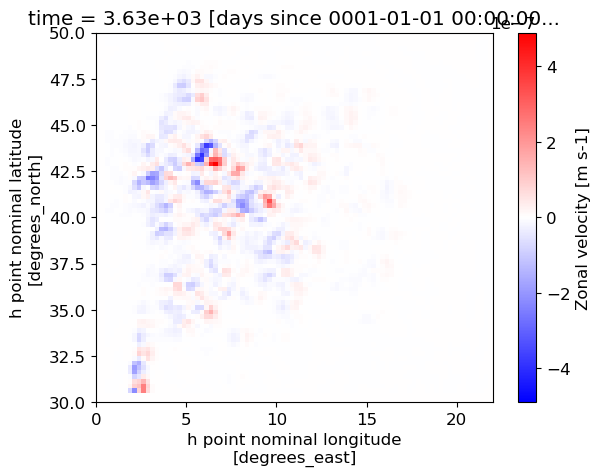

In [45]:
%matplotlib inline
low_rez['S_x'].isel(time=-1).plot(cmap='bwr')
plt.show()

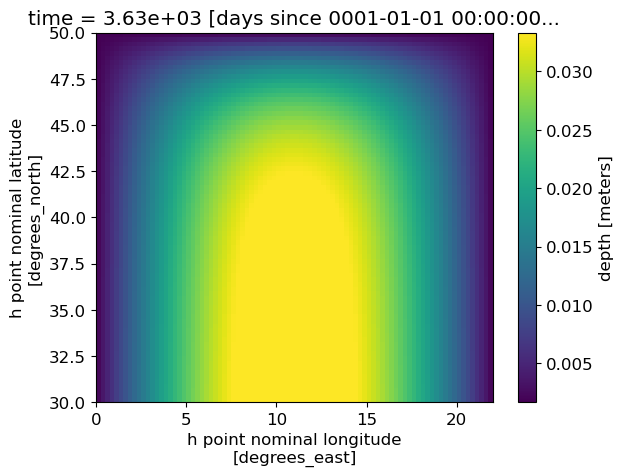

In [46]:
%matplotlib inline
low_rez['depth'][-1,:,:].plot()
plt.show()

In [34]:
import torch
import importlib
import time
from torch.nn import Parameter

args_no_cuda = False #True when manually turn off cuda
use_cuda = not args_no_cuda and torch.cuda.is_available()
if use_cuda:
    print('device for inference on',torch.cuda.device_count(),'GPU(s)')
else:
    print('device for inference on CPU')

#load the neural network
def load_model_cls(model_module_name: str, model_cls_name: str):
    try:
        module = importlib.import_module(model_module_name)
        model_cls = getattr(module, model_cls_name)
    except ModuleNotFoundError as e:
        raise type(e)('Could not retrieve the module in which the trained model \
                      is defined: ' + str(e))
    except AttributeError as e:
        raise type(e)('Could not retrieve the model\'s class. ' + str(e))
    return model_cls
def load_paper_net(device: str = 'gpu'):
    """
        Load the neural network from the paper
    """
    print('In load_paper_net()')
    model_module_name = 'models.models1'
    model_cls_name = 'FullyCNN'
    model_cls = load_model_cls(model_module_name, model_cls_name)
    print('After load_model_cls()')
    net = model_cls(3,4,batch_norm=1)

    # final_transform= '/scratch/cimes/cz3321/MOM6/MOM6-examples/src/MOM6/config_src/external/ML_Forpy/Forpy_CNN_GZ21/final_transformation_04292023.pth'
    # print('After net')
    # if device == 'cpu':
    #     transformation = torch.load(final_transform)
    #     print('After torch.load()')
    # else:
    #     transformation = pickle_artifact(MODEL_RUN_ID, 'models/transformation')
    # net.final_transformation = transformation
    print('After transformation')
    # Load parameters of pre-trained model
    print('After mlflow.tracking.MlflowClient()')
    
    
    # ----------------- CHANGE THIS PATH TO TRAINED MODEL ----------------- #
    model_file = '/scratch/cimes/cz3321/MOM6/MOM6-examples/src/MOM6/config_src/external/ML_Forpy/Forpy_CNN_GZ21/trained_model_depth.pth'
    # ---------------------------------------------------- #

    model_module_name = 'models.transforms'
    model_cls_name = 'SoftPlusTransform'
    model_cls = load_model_cls(model_module_name, model_cls_name)
    model_cls_name = 'PrecisionTransform'
    model_cls1 = load_model_cls(model_module_name, model_cls_name)
    transform = model_cls.__new__(model_cls,)
    model_cls1.__init__(transform,)
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    transform._min_value = Parameter(state_dict.pop('final_transformation._min_value'))
    transform.indices = slice(2,4)
    print('After download_artifacts()')
    print(state_dict.keys())
    print(net.state_dict().keys())
    net.load_state_dict(state_dict)
    net.final_transformation = transform
    print(net)
    return net
net = load_paper_net('cpu')
net.eval()

device for inference on CPU
In load_paper_net()
After load_model_cls()
After transformation
After mlflow.tracking.MlflowClient()
After download_artifacts()
odict_keys(['0.weight', '0.bias', '2.weight', '2.bias', '2.running_mean', '2.running_var', '2.num_batches_tracked', '3.weight', '3.bias', '5.weight', '5.bias', '5.running_mean', '5.running_var', '5.num_batches_tracked', '6.weight', '6.bias', '8.weight', '8.bias', '8.running_mean', '8.running_var', '8.num_batches_tracked', '9.weight', '9.bias', '11.weight', '11.bias', '11.running_mean', '11.running_var', '11.num_batches_tracked', '12.weight', '12.bias', '14.weight', '14.bias', '14.running_mean', '14.running_var', '14.num_batches_tracked', '15.weight', '15.bias', '17.weight', '17.bias', '17.running_mean', '17.running_var', '17.num_batches_tracked', '18.weight', '18.bias', '20.weight', '20.bias', '20.running_mean', '20.running_var', '20.num_batches_tracked', '21.weight', '21.bias'])
odict_keys(['0.weight', '0.bias', '2.weight', '2.bias

FullyCNN(
  (0): Conv2d(3, 128, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Conv2d(128, 64, kernel_size=(5, 5), stride=(1, 1))
  (4): ReLU()
  (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): Conv2d(64, 32, kernel_size=(3, 3), stride=(1, 1))
  (7): ReLU()
  (8): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (10): ReLU()
  (11): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (13): ReLU()
  (14): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (15): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (16): ReLU()
  (17): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (18): Conv2d(32, 32, kernel_si

In [35]:
device = torch.device('cpu')
from train.losses import HeteroskedasticGaussianLossV2

In [36]:
criterion = HeteroskedasticGaussianLossV2(n_target_channels=2)

In [37]:
from testing.utils import (create_large_test_dataset, create_test_dataset)
from torch.utils.data import DataLoader

In [47]:
from data.datasets import (RawDataFromXrDataset, DatasetTransformer,
                           Subset_, DatasetWithTransform, ComposeTransforms,
                           MultipleTimeIndices, DatasetPartitioner)
low_rez = low_rez.fillna(0)
dataset = RawDataFromXrDataset(low_rez * 10.)
dataset.index = 'time'
dataset.add_input('usurf')
dataset.add_input('vsurf')
dataset.add_input('depth')
dataset.add_output('S_x')
dataset.add_output('S_y')
features_transform_ = ComposeTransforms()
targets_transform_ = ComposeTransforms()
transform = DatasetTransformer(features_transform_, targets_transform_)
transform.fit(dataset)
dataset = DatasetWithTransform(dataset, transform)
test = create_large_test_dataset(net.to(device=device), criterion, [dataset, ], [DataLoader(dataset)], device)
test = test.rename(dict(longitude='xu_ocean', latitude='yu_ocean'))
test

<xarray.Dataset>
Dimensions:   (time: 121, yu_ocean: 80, xu_ocean: 88)
Coordinates:
  * time      (time) float64 30.0 60.0 90.0 120.0 ... 3.57e+03 3.6e+03 3.63e+03
  * yu_ocean  (yu_ocean) float64 30.12 30.38 30.62 30.88 ... 49.38 49.62 49.88
  * xu_ocean  (xu_ocean) float64 0.125 0.375 0.625 0.875 ... 21.38 21.62 21.88
Data variables:
    S_x       (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(121, 80, 88), meta=np.ndarray>
    S_y       (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(121, 80, 88), meta=np.ndarray>
    S_xscale  (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(121, 80, 88), meta=np.ndarray>
    S_yscale  (time, yu_ocean, xu_ocean) float64 dask.array<chunksize=(121, 80, 88), meta=np.ndarray>

In [39]:
dataset

In [48]:
# if init_test==True:
with ProgressBar():
  test = test.compute()

[########################################] | 100% Completed | 112.58 s


In [41]:
# if init_test==True:
#   test.to_netcdf('offline_double_dyre_test.nc')
# else:
#   test = xr.open_dataset('offline_double_dyre_test.nc')
test

<xarray.Dataset>
Dimensions:   (time: 121, yu_ocean: 80, xu_ocean: 88)
Coordinates:
  * time      (time) float64 30.0 60.0 90.0 120.0 ... 3.57e+03 3.6e+03 3.63e+03
  * yu_ocean  (yu_ocean) float64 30.12 30.38 30.62 30.88 ... 49.38 49.62 49.88
  * xu_ocean  (xu_ocean) float64 0.125 0.375 0.625 0.875 ... 21.38 21.62 21.88
Data variables:
    S_x       (time, yu_ocean, xu_ocean) float32 -188.8 -77.39 ... 29.8 133.2
    S_y       (time, yu_ocean, xu_ocean) float32 154.2 209.0 ... 51.15 -37.98
    S_xscale  (time, yu_ocean, xu_ocean) float32 1.209 1.209 ... 1.209 1.209
    S_yscale  (time, yu_ocean, xu_ocean) float32 1.209 1.209 ... 1.209 1.209

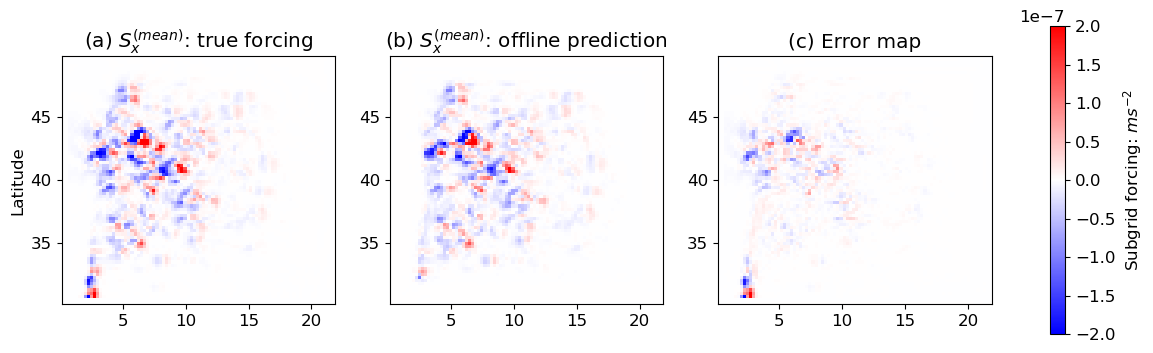

In [49]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
plt.rcParams.update({'font.size': 12})
ax = ax.reshape(-1)
S_test = test.isel(time=-1)['S_x']*(1e-7)
S_true = low_rez.isel(time=-1)['S_x']
error = S_true-S_test
xq = test['xu_ocean']
yq = test['yu_ocean']

p = ax[0].imshow(S_true, origin='lower',
    extent=[xq.min(),xq.max(),yq.min(),yq.max()], 
    cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
# ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('(a) $S_{x}^{(mean)}$: true forcing')

p = ax[1].imshow(S_test, origin='lower',
    extent=[xq.min(),xq.max(),yq.min(),yq.max()], 
    cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
# ax[1].set_xlabel('Longitude')
ax[1].set_title('(b) $S_{x}^{(mean)}$: offline prediction')

p = ax[2].imshow(error, origin='lower',
    extent=[xq.min(),xq.max(),yq.min(),yq.max()], 
    cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
# ax[2].set_xlabel('Longitude')
ax[2].set_title('(c) Error map')

fig.colorbar(p, ax=ax, label='Subgrid forcing: $ms^{-2}$')
if layer==0 and plot_output==True:
    plt.savefig('../Paper_figures/figureB_1_1.png', dpi=300, bbox_inches="tight")

# test.isel(time=-10)['S_x'].plot(vmin=-1, vmax=1, cmap='bwr')

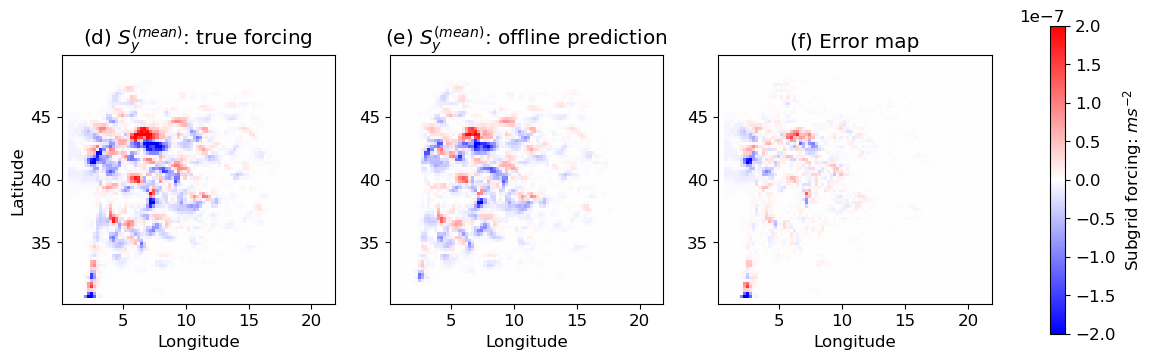

In [50]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
plt.rcParams.update({'font.size': 12})
ax = ax.reshape(-1)
S_test = test.isel(time=-1)['S_y']*(1e-7)
S_true = low_rez.isel(time=-1)['S_y']
error = S_true-S_test
xq = test['xu_ocean']
yq = test['yu_ocean']

p = ax[0].imshow(S_true, origin='lower',
    extent=[xq.min(),xq.max(),yq.min(),yq.max()], 
    cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('(d) $S_{y}^{(mean)}$: true forcing')

p = ax[1].imshow(S_test, origin='lower',
    extent=[xq.min(),xq.max(),yq.min(),yq.max()], 
    cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
ax[1].set_xlabel('Longitude')
ax[1].set_title('(e) $S_{y}^{(mean)}$: offline prediction')

p = ax[2].imshow(error, origin='lower',
    extent=[xq.min(),xq.max(),yq.min(),yq.max()], 
    cmap='bwr', vmin=-2*1e-7, vmax = 2*1e-7)
ax[2].set_xlabel('Longitude')
ax[2].set_title('(f) Error map')

fig.colorbar(p, ax=ax, label='Subgrid forcing: $ms^{-2}$')
if layer==0 and plot_output==True:
    plt.savefig('../Paper_figures/figureB_1_2.png', dpi=300, bbox_inches="tight")

# (low_rez.isel(time=-10)['S_x']*1e7).plot(vmin=-1, vmax=1, cmap='bwr')

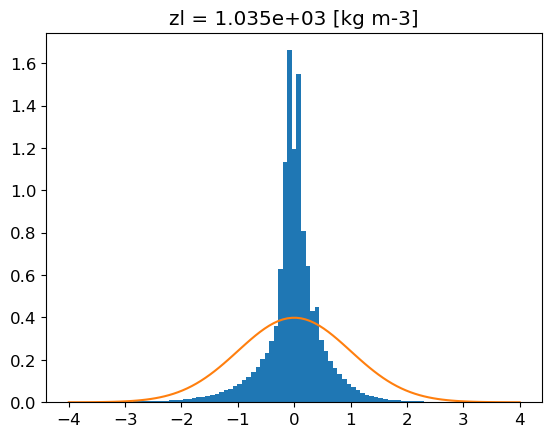

In [51]:
from scipy.stats import norm
plt.figure()
((low_rez['S_x']*1e7 - test['S_x'])
 * (test['S_xscale'])).plot.hist(bins=np.linspace(-4, 4, 100), density=True)
plt.plot(np.linspace(-4, 4, 100), norm.pdf(np.linspace(-4, 4, 100)))

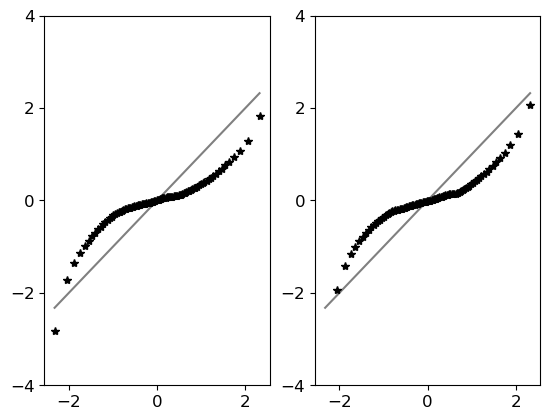

In [52]:
plt.figure()
for i, var in enumerate(['S_x', 'S_y']):
    residuals_t = ((low_rez[var]*1e7 - test[var]) * (test[f'{var}scale']))
    quantiles = np.linspace(0., 1., 100)
    norm_quantiles = norm.ppf(quantiles)
    obs_quantiles = np.nanquantile(residuals_t.values[::20, ::, ::], quantiles)
    plt.subplot(1, 2, i + 1)
    plt.plot(norm_quantiles, norm_quantiles, 'gray')
    plt.plot(norm_quantiles, obs_quantiles, 'k*')
    plt.ylim(-4, 4)
    plt.yticks(np.arange(-4, 5, 2))

In [34]:
# x = low_rez['S_x'].values.flatten()
# x = np.nan_to_num(x, nan=0)
# y = test['S_x'].values.flatten()*1e-7

# plt.scatter(x, y, s=10, alpha=0.5)

# fitcoef = np.polyfit(x, y, 1)
# regression_line = fitcoef[0] * x + fitcoef[1]

# plt.plot(x, regression_line, color='red', label='Linear Regression')

# plt.plot(x, x, linestyle='dashed', color='black', label='y=x')

# plt.xlabel('Sx_true')
# plt.ylabel('Sx_pred')
# plt.legend()

# correlation = np.corrcoef(x, y)[0, 1]
# print(correlation)

# plt.show()

In [35]:
aaa=low_rez['S_x'][0,:,:]

In [53]:
mse = dict()
variance = dict()
r_squared = dict()
correlation = dict()
for var in ['S_x', 'S_y']:
    mse[var] = ((test[var] - low_rez[var]*1e7)**2).mean(dim='time')
    variance[var] = ((low_rez[var]*1e7)**2).mean(dim='time')
    r_squared[var] = 1 - mse[var] / variance[var]
    correlation[var] = xr.corr(test[var], low_rez[var]*1e7, dim='time')

In [37]:
aa=r_squared['S_x']

/home/cz3321/.conda/envs/smartsim_gpu2/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/home/cz3321/.conda/envs/smartsim_gpu2/lib/python3.9/site-packages/dask/core.py:119: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


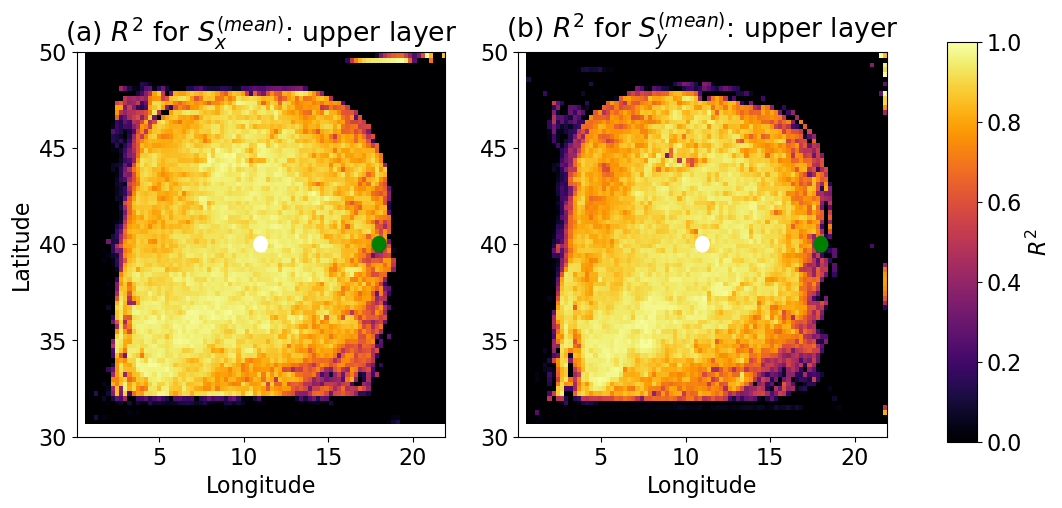

In [54]:
from matplotlib.patches import Arrow, Circle
fig = plt.figure(figsize=(12,5))
plt.rcParams.update({'font.size': 16})
extent = (low_rez['xu_ocean'].min(), low_rez['xu_ocean'].max(), low_rez['yu_ocean'].min(), low_rez['yu_ocean'].max())
for i, var in enumerate(['S_x', 'S_y']):
    plt.subplot(1, 2, i + 1)
    im = plt.imshow(r_squared[var].values, vmin=0, vmax=1, cmap='inferno',
                   origin='lower', extent=extent, aspect="auto")
    
    if i == 0:
        plt.yticks((30, 35, 40, 45, 50))
        plt.ylabel('Latitude')
        if layer==0:
            patches = [Circle((11, 40), radius=0.4, color='white'),
                       Circle((18, 40), radius=0.4, color='green'),]
            for patch in patches:
                im.axes.add_patch(patch)
            plt.title('(a) $R^2$ for $S_{x}^{(mean)}$: '+LAYER)
        elif layer==1:
            plt.title('(c) $R^2$ for $S_{x}^{(mean)}$: '+LAYER)
    elif i == 1:
        plt.yticks((30, 35, 40, 45, 50))
        if layer==0:
            patches = [Circle((11, 40), radius=0.4, color='white'),
                       Circle((18, 40), radius=0.4, color='green'),]
            for patch in patches:
                im.axes.add_patch(patch)
            plt.title('(b) $R^2$ for $S_{y}^{(mean)}$: '+LAYER)
        elif layer==1:
            plt.title('(d) $R^2$ for $S_{y}^{(mean)}$: '+LAYER)
    # if layer==1:
    plt.xlabel('Longitude')


fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.1, 0.025, 0.8])
cbar = fig.colorbar(im, cax=cbar_ax, label=r'$R^2$')
if layer==0 and plot_output==True:
    plt.savefig('../Paper_figures/figureB_2_1.png', dpi=300, bbox_inches="tight")
elif layer==1 and plot_output==True:
    plt.savefig('../Paper_figures/figureB_2_2.png', dpi=300, bbox_inches="tight")

In [39]:
Sx=r_squared['S_x']

In [40]:
low_rez['xu_ocean']
low_rez['yu_ocean']

<xarray.DataArray 'yu_ocean' (yu_ocean: 80)>
array([30.125, 30.375, 30.625, 30.875, 31.125, 31.375, 31.625, 31.875, 32.125,
       32.375, 32.625, 32.875, 33.125, 33.375, 33.625, 33.875, 34.125, 34.375,
       34.625, 34.875, 35.125, 35.375, 35.625, 35.875, 36.125, 36.375, 36.625,
       36.875, 37.125, 37.375, 37.625, 37.875, 38.125, 38.375, 38.625, 38.875,
       39.125, 39.375, 39.625, 39.875, 40.125, 40.375, 40.625, 40.875, 41.125,
       41.375, 41.625, 41.875, 42.125, 42.375, 42.625, 42.875, 43.125, 43.375,
       43.625, 43.875, 44.125, 44.375, 44.625, 44.875, 45.125, 45.375, 45.625,
       45.875, 46.125, 46.375, 46.625, 46.875, 47.125, 47.375, 47.625, 47.875,
       48.125, 48.375, 48.625, 48.875, 49.125, 49.375, 49.625, 49.875])
Coordinates:
  * yu_ocean  (yu_ocean) float64 30.12 30.38 30.62 30.88 ... 49.38 49.62 49.88
    zl        float64 1.035e+03
    yq        (yu_ocean) float64 30.12 30.38 30.62 30.88 ... 49.38 49.62 49.88
Attributes:
    long_name:       h point nominal latitude
    units:           degrees_north
    cartesian_axis:  Y

44   40


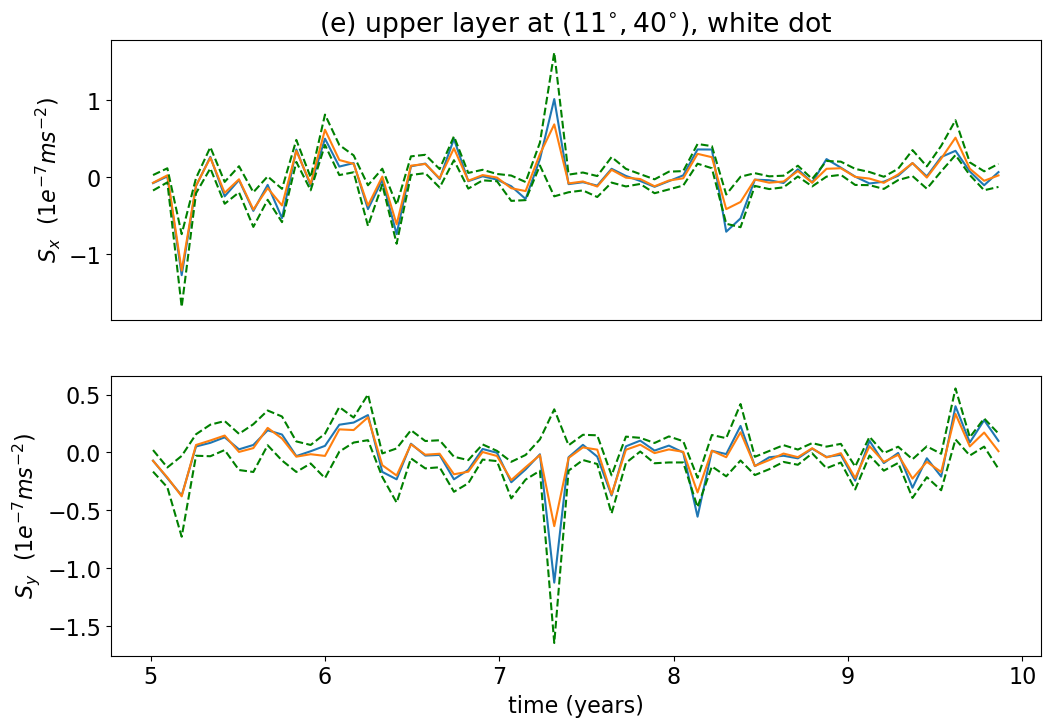

In [55]:
x = 44
y = 40
s = (60, 120) 
print(x, ' ', y)
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
for i, var in enumerate(['S_x', 'S_y']):
    ax = plt.subplot(2, 1, i + 1)
    plt.plot(low_rez['time'][s[0]:s[1]]/365, low_rez[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1]))*1e7)
    plt.plot(low_rez['time'][s[0]:s[1]]/365, test[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1])))
    ub = (test[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1]))
          + 1.96 / test[f'{var}scale'].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1])))
    lb = (test[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1]))
          - 1.96 / test[f'{var}scale'].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1])))
    plt.plot(test['time'][s[0]:s[1]]/365, ub, '--g')
    plt.plot(test['time'][s[0]:s[1]]/365, lb, '--g')
    if i == 0:
        ax.set_xticks([])
        ax.set_title('(e) '+LAYER+' at $(11^{\circ},40^{\circ})$, white dot')
    if i == 1:
        plt.xlabel('time (years)')
    plt.ylabel(fr'${var}$' + '  ' +  r'$(1e^{-7}ms^{-2}$)')
if layer==0 and plot_output==True:
    plt.savefig('../Paper_figures/figureB_3.png', dpi=300, bbox_inches="tight")

72   40


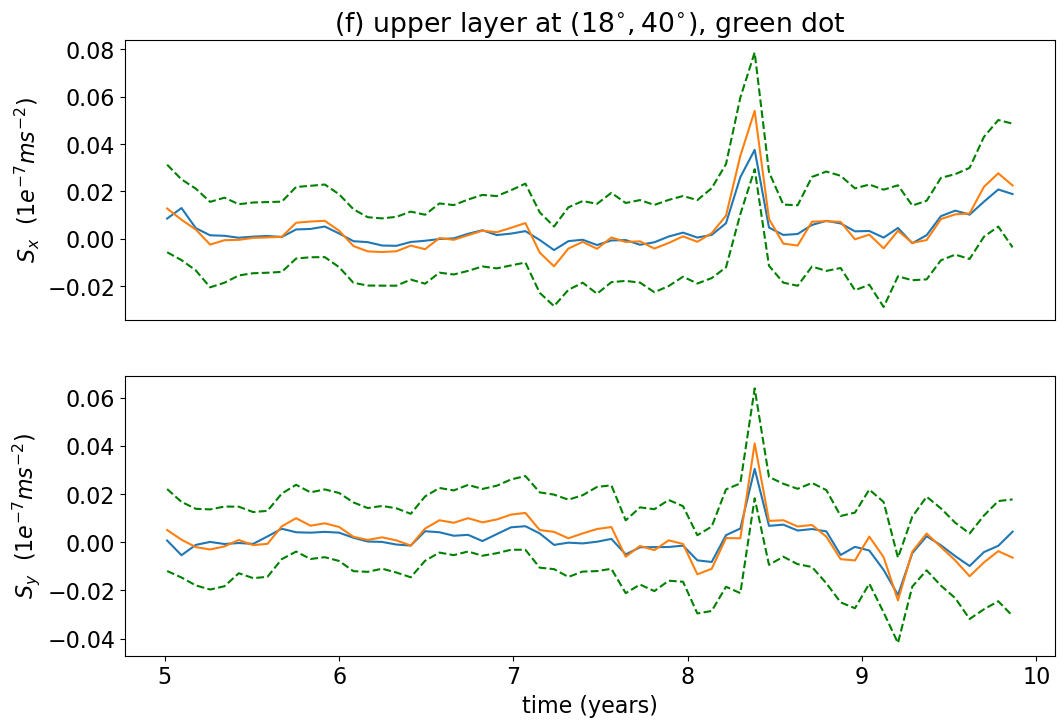

In [56]:
x = 72
y = 40
s = (60, 120) 
print(x, ' ', y)
fig = plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 16})
for i, var in enumerate(['S_x', 'S_y']):
    ax = plt.subplot(2, 1, i + 1)
    plt.plot(low_rez['time'][s[0]:s[1]]/365, low_rez[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1]))*1e7)
    plt.plot(low_rez['time'][s[0]:s[1]]/365, test[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1])))
    ub = (test[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1]))
          + 1.96 / test[f'{var}scale'].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1])))
    lb = (test[var].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1]))
          - 1.96 / test[f'{var}scale'].isel(xu_ocean=x, yu_ocean=y, time=slice(s[0],s[1])))
    plt.plot(test['time'][s[0]:s[1]]/365, ub, '--g')
    plt.plot(test['time'][s[0]:s[1]]/365, lb, '--g')
    if i == 0:
        ax.set_xticks([])
        ax.set_title('(f) '+LAYER+' at $(18^{\circ},40^{\circ})$, green dot')
    if i == 1:
        plt.xlabel('time (years)')
    plt.ylabel(fr'${var}$' + '  ' +  r'$(1e^{-7}ms^{-2}$)')
if layer==0 and plot_output==True:
    plt.savefig('../Paper_figures/figureB_4.png', dpi=300, bbox_inches="tight")

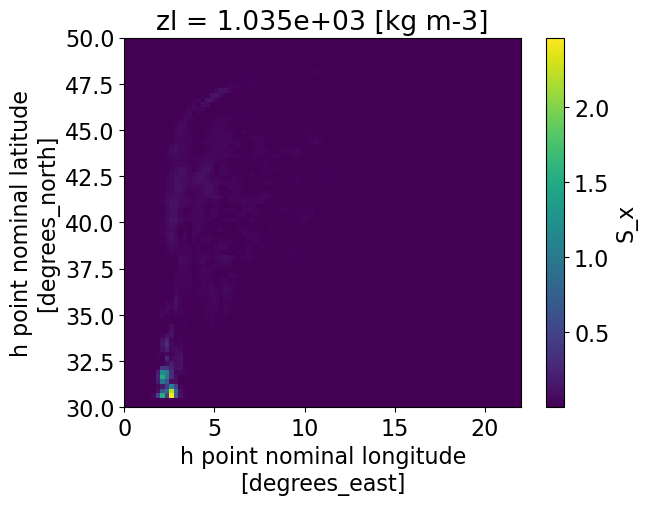

In [58]:
plt.figure()
#((low_rez['S_y']*1e7 - test['S_y']).median(dim='time') ).plot()
#residuals_t.median(dim='time').plot(vmin=0, vmax=1)
(abs(((low_rez['S_x']*1e7 - test['S_x'])).mean(dim='time'))).plot()

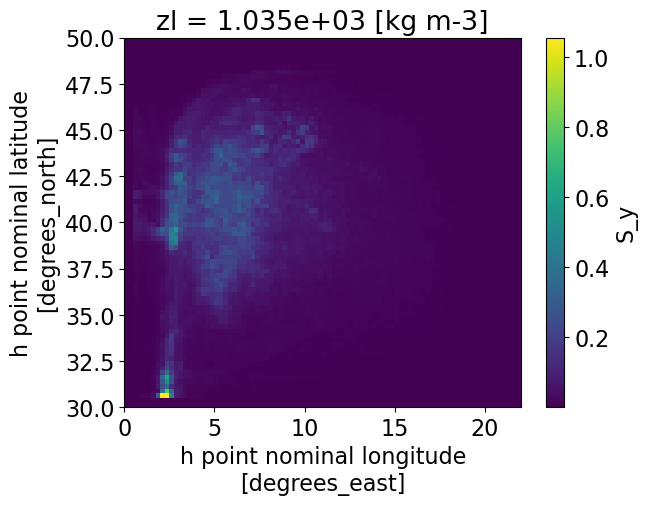

In [60]:
plt.figure()
#((low_rez['S_y']*1e7 - test['S_y']).median(dim='time') ).plot()
#residuals_t.median(dim='time').plot(vmin=0, vmax=1)
(abs(((low_rez['S_y']*1e7 - test['S_y'])).std(dim='time'))).plot()

In [56]:
aa=low_rez['S_x']
aaa=test['S_x']